<a href="https://colab.research.google.com/github/ManishInde/sy/blob/main/exp1%262.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/HR_comma_sep.csv')
df.head(100)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
95,0.37,0.51,2,155,3,0,1,0,sales,low
96,0.10,0.77,6,265,4,0,1,0,sales,low
97,0.10,0.84,6,279,4,0,1,0,sales,low
98,0.11,0.97,6,284,4,0,1,0,sales,low


In [ ]:
# @title Replacing nan values with mean value
# Check for missing values
df.isnull().sum()

# If there are missing values, you can fill them with mean (for numerical) or mode (for categorical)
df.fillna(df.mean(), inplace=True)


In [ ]:
# @title Declaring target column
# Define features (X) and target (y)
X = df.drop('time_spend_company', axis=1)  # Drop target column
y = df['time_spend_company']


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
# @title Training ml model
x_train, x_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 42)

In [ ]:
# @title Implementing  Linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model on the training set
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared value

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')


Mean Squared Error: 1.94
R-squared: 0.07


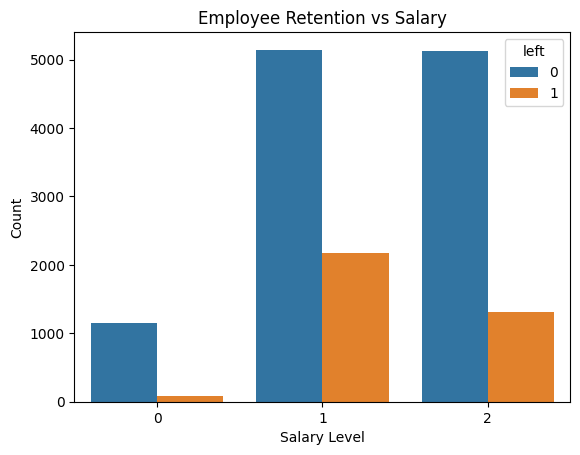

In [ ]:
# @title Impact of employee salaries on retention
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is the dataset
sns.countplot(x='salary', hue='left', data=df)
plt.title('Employee Retention vs Salary')
plt.xlabel('Salary Level')
plt.ylabel('Count')
plt.show()


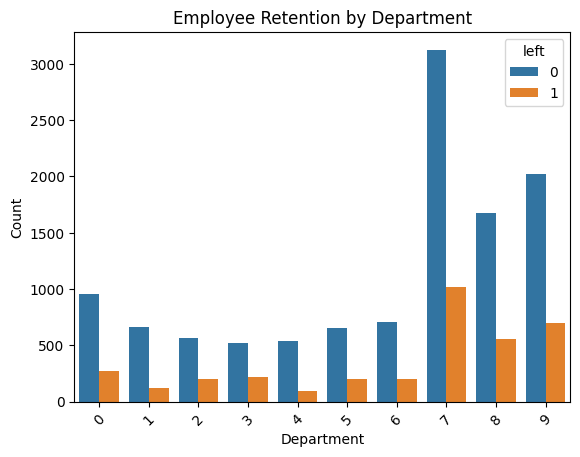

In [ ]:
# @title Correlation  between  department employee retention
import matplotlib.pyplot as plt
import seaborn as sns


sns.countplot(x='Department', hue='left', data=df)
plt.title('Employee Retention by Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# @title Data accuracy using Logistic Regression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Feature selection based on exploratory analysis

X = df[['satisfaction_level', 'salary', 'Department', 'last_evaluation']]  # Example features

# One-hot encode categorical variables (e.g., 'salary' and 'department')
X = pd.get_dummies(X, drop_first=True)  # drop_first to avoid dummy variable trap

# Target variable (employee left or not)
y = df['left']  # 1 if employee left, 0 if stayed

# Split data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build the logistic regression model
model = LogisticRegression(max_iter=1000)  # increase max_iter if convergence issues
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)


# Output the results
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)



Accuracy: 0.757
Confusion Matrix:
[[2107  187]
 [ 542  164]]
